In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../../functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = '/work/bk1377/a270230/'
path_stat = path + 'statistics/'
path_imgs = path + 'imgs/'

LKFs = np.load(path_stat + f'LKFs_4km_all.npy', allow_pickle=True)[0]

## calculate the monthly mean of all variables

In [3]:
years = [i for i in LKFs.keys() if len(i)==4]
startdays_of_months = (np.append(0, xticks)+1)[:-1]
enddays_of_months = xticks

for year in years:

    df = pd.DataFrame()
    for var in  LKFs['2020'].keys():

        monthly_means = []
        for startday, endday in zip(startdays_of_months, enddays_of_months):
            monthly_means += np.nanmean([LKFs[year][var][i] for i in range(startday,endday+1)]),

        df[var] = monthly_means
    df.index = df.index + 1

    LKFs[year+' monthly mean'] = df

## plot the trend of all months seperately
just to view it here, don't actually use this in the paper

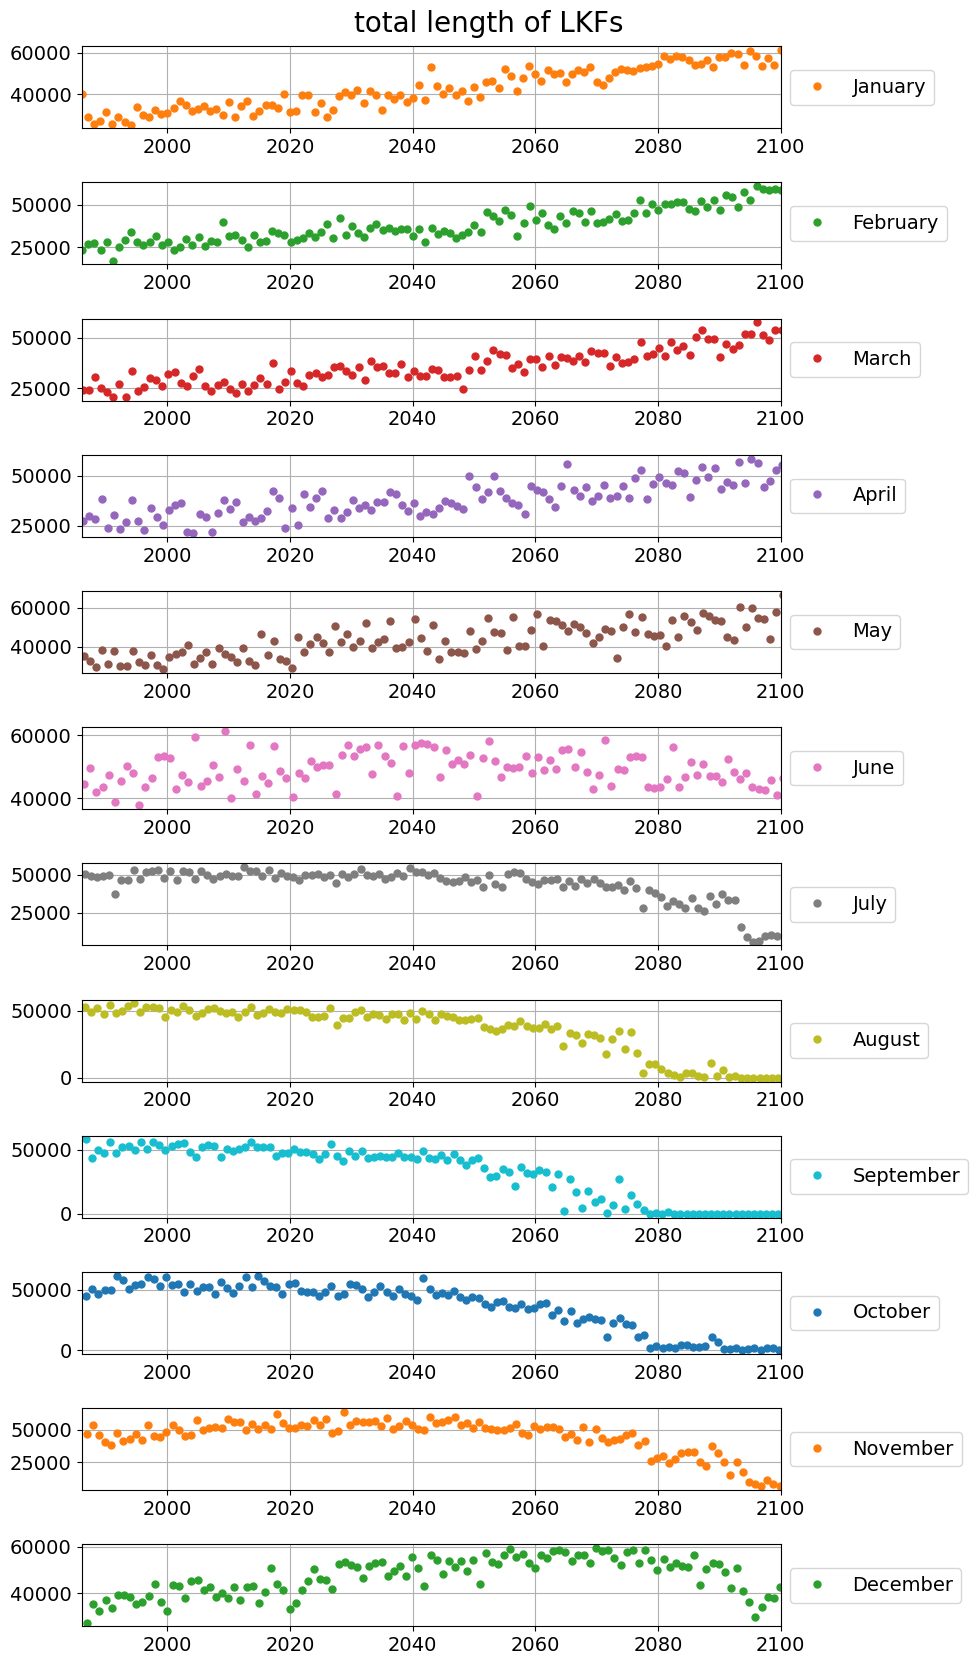

In [4]:
fig = plt.figure(figsize=(10,17))
axs = [fig.add_subplot(12,1,row) for row in np.arange(1,13)]

var = 'total length'

for ax, month in zip(axs, np.arange(1,13)):
    for year in years:
        im, = ax.plot(int(year)+(month-1)/12, LKFs[year+' monthly mean'][var][month],
                      'o', markersize=5, color=f'C{month}')
    im.set_label(month_strings[month-1])
    ax.grid()
    ax.set_xlim([int(years[0]),int(years[-1])])
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

fig.suptitle(var+' of LKFs', fontsize=20)
fig.tight_layout()

## put seasons together in subplots
just to view it here, don't actually use this in the paper

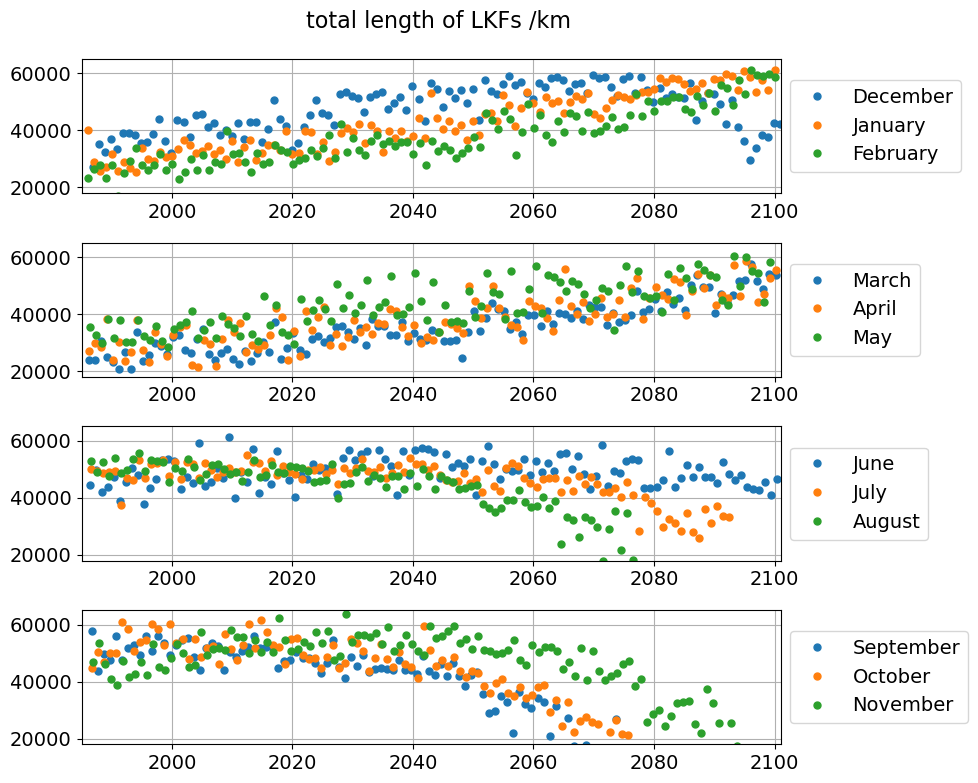

In [5]:
fig = plt.figure(figsize=(10,8))
axs = [fig.add_subplot(4,1,row) for row in np.arange(1,5)]

variable = 'total length'

seasons = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]

for ax, season in zip(axs, seasons):
    for i, i_month in enumerate(season):
        for year in years:
            plty, = ax.plot(int(year)+(i_month-1)/12,
                                LKFs[f'{year} monthly mean'][variable][i_month],
                                'o', markersize=5,color=f'C{i}')
        plty.set_label(month_strings[i_month-1])
        ax.grid()
        ax.set_ylim([18000,65000])
        ax.set_xlim([1985,2101])

        ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

fig.suptitle(f'{variable} of LKFs /km', fontsize=16, x=0.45)
fig.tight_layout()

## average over seasons

In [6]:
seasons_months = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]

for year in years:

    df = pd.DataFrame()
    for var in  LKFs['2020'].keys():
        
        seasonal_means = []
        for months in seasons_months:
            
            seasonal_means += np.nanmean([LKFs[year+' monthly mean'][var][i] for i in months]),
        df[var] = seasonal_means
    df.index = df.index+1
    LKFs[year+' seasonal mean'] = df

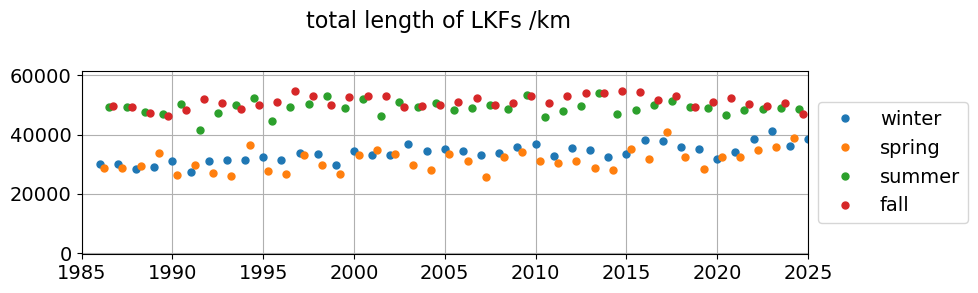

In [7]:
fig, ax = plt.subplots(figsize=(10,3))

variable = 'total length'
seasons = ['winter', 'spring', 'summer', 'fall']

for season in range(1,5):
    for year in years:
        im, = ax.plot(int(year)+(season-1)/4, LKFs[year+' seasonal mean'][variable][season],
               'o', markersize=5, color=f'C{season-1}')
    im.set_label(seasons[season-1])

ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
ax.set_xlim([1985,2025])
ax.grid()

fig.suptitle(f'{variable} of LKFs /km', fontsize=16, x=0.45)
fig.tight_layout()

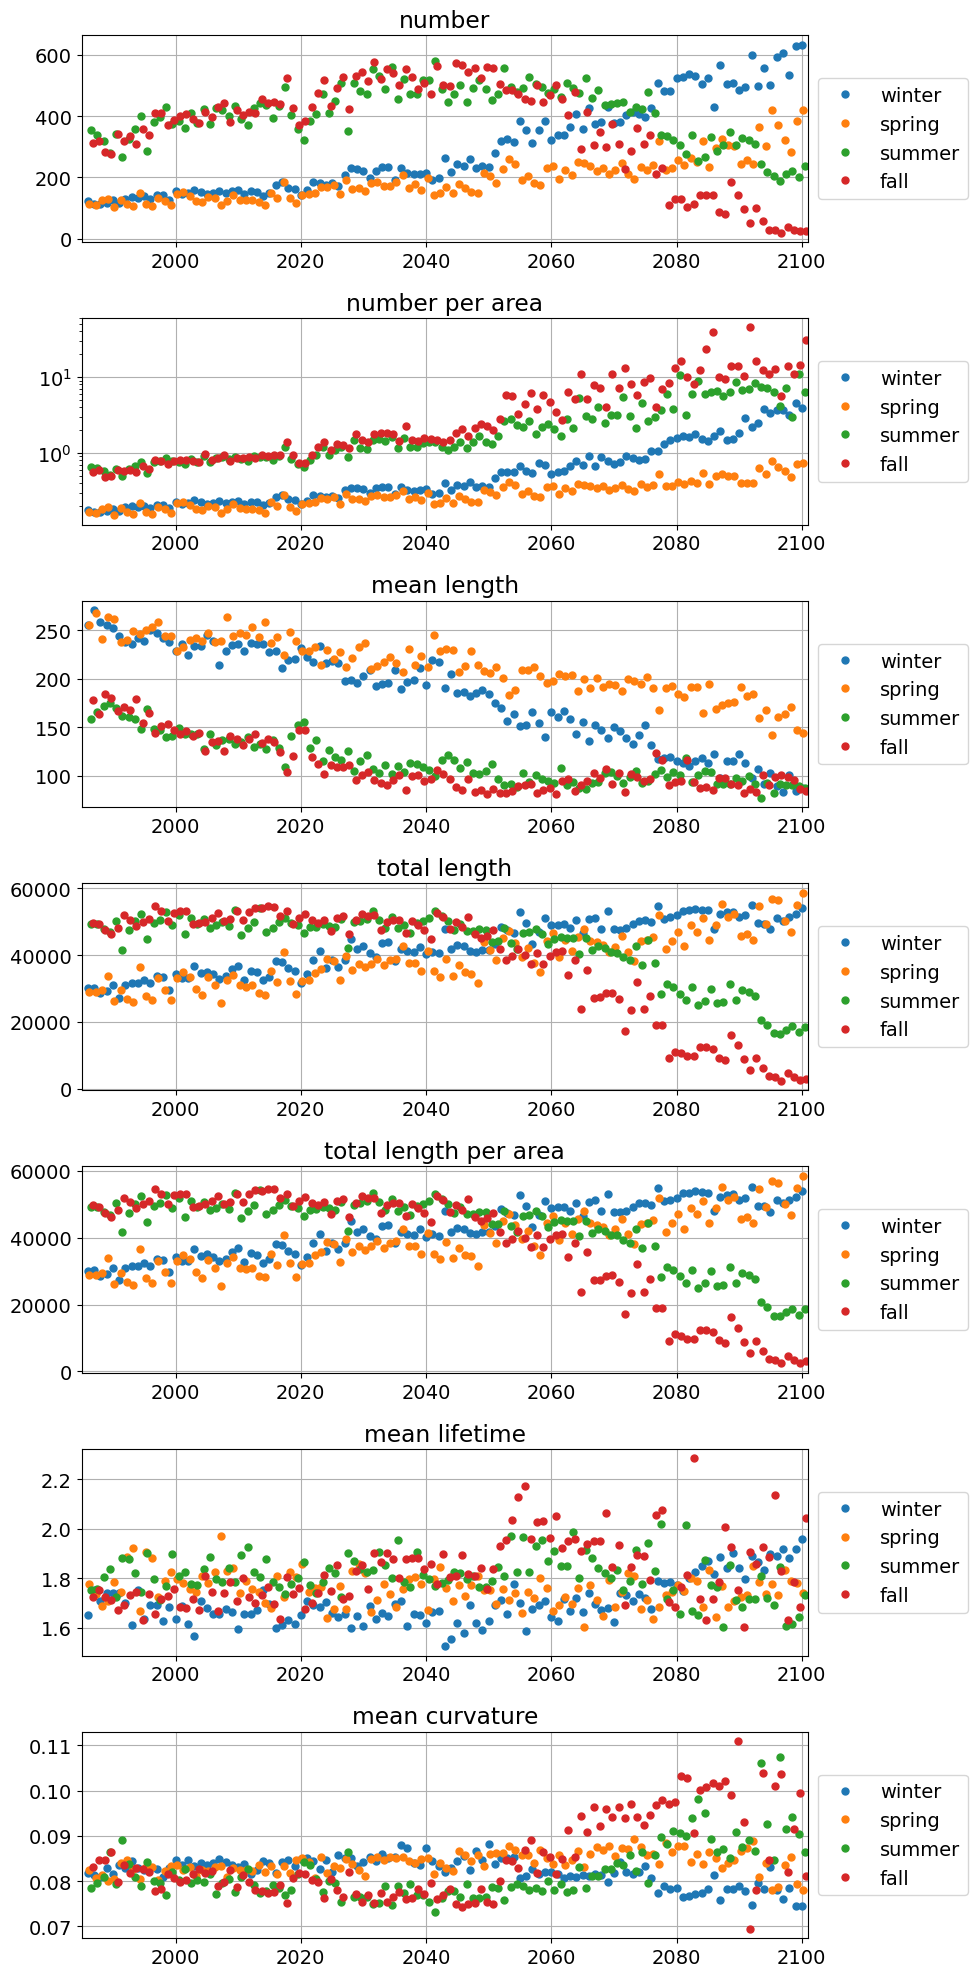

In [8]:
fig, axs = plt.subplots(7,1, figsize=(10,20))

seasons = ['winter', 'spring', 'summer', 'fall']
variables = ['number', 'number per area', 'mean length','total length',
             'total length per area', 'mean lifetime','mean curvature']
ylims = [None, [0,60], None, None, None, None, None]
scales = ['linear', 'log', 'linear', 'linear', 'linear', 'linear', 'linear']

for ax, variable, ylim, scale in zip(axs, variables, ylims, scales):
    for season in range(1,5):
        for year in years:
            im, = ax.plot(int(year)+(season-1)/4, LKFs[year+' seasonal mean'][variable][season],
                   'o', markersize=5, color=f'C{season-1}')
        im.set_label(seasons[season-1])

    ax.set_title(f'{variable}')
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
    ax.set_yscale(scale)
    ax.set_ylim(ylim)
    ax.set_xlim([1985,2101])
    ax.grid()

fig.tight_layout()